Ellyza Hardianty (2022071015)

In [4]:
#Slide 22
#Adjency Matrix
import numpy as np

#Define the adjacency matrix
adjacency_matrix = np.array([[0, 1, 0, 0],
                             [0, 0, 1, 0],
                             [0, 1, 0, 1],
                             [1, 0, 1, 0]])
#Set the damping factor
damping_factor = 0.85

#Initialize the PageRank values
num_pages = len(adjacency_matrix)
page_rank = np.ones(num_pages) / num_pages

#Number of iterations
num_iterations = 100

for i in range(num_iterations):
  new_page_rank = np.zeros(num_pages)
  for j in range(num_pages):
    #Calculate the PageRank contribution from each linking page
    linking_pages = [k for k in range(num_pages) if adjacency_matrix[k, j] == 1]
    for linking_pages in linking_pages:
      new_page_rank[j] += page_rank[linking_pages] / sum(adjacency_matrix[linking_pages, :])
    new_page_rank[j] = damping_factor * new_page_rank[j] + (1 - damping_factor) / num_pages
  page_rank = new_page_rank

#Print the final PageRank values
for page, rank in enumerate(page_rank):
  print(f"PR(Page {page + 1}) = {rank:.3f}")

PR(Page 1) = 0.122
PR(Page 2) = 0.302
PR(Page 3) = 0.378
PR(Page 4) = 0.198


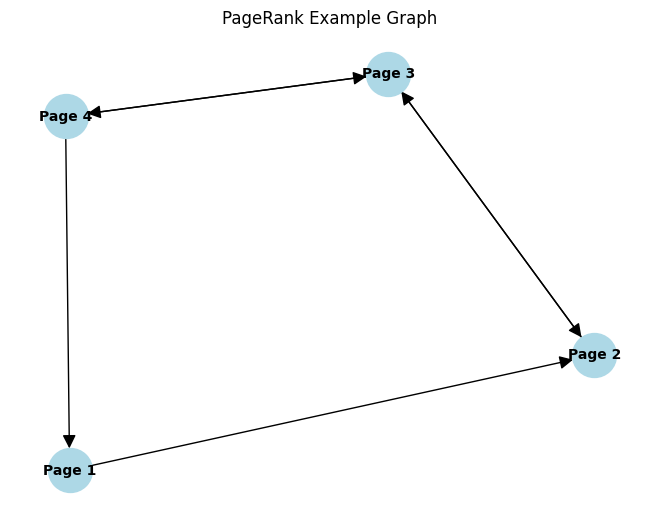

In [15]:
#Slide 24
#Membuat Graph dari Adjacency Matriks
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#Define the adjacency matrix
adjacency_matrix = np.array([[0, 1, 0, 0],
                             [0, 0, 1, 0],
                             [0, 1, 0, 1],
                             [1, 0, 1, 0]])

#Create a directed graph
G = nx.DiGraph()

#Add nodes
num_pages = len(adjacency_matrix)
G.add_nodes_from(range(num_pages))

#Add edges based on the adjacencey matrix
for i in range(num_pages):
  for j in range(num_pages):
    if adjacency_matrix[i, j] == 1:
      G.add_edge(i, j)

#Draw the Graph
pos = nx.spring_layout(G) #Layout the graph
labels = {i: f"Page {i+1}" for i in range(num_pages)}
nx.draw(G, pos, with_labels=True, labels=labels, node_size=1000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)
plt.title("PageRank Example Graph")
plt.show()

In [50]:
#Slide 26 membuat algoritma
import numpy as np

#Define the adjacency matrix
def pageRank(adjacency_matrix):

  #Set the damping factor
  damping_factor = 0.85

  #Initialize the PageRank values
  num_pages = len(adjacency_matrix)
  page_rank = np.ones(num_pages) / num_pages

  #Number of iterations
  num_iterations = 100

  for i in range(num_iterations):
    new_page_rank = np.zeros(num_pages)
    for j in range(num_pages):
      #Calculate the PageRank contribution from each linking page
      linking_pages = [k for k in range(num_pages) if adjacency_matrix[k, j] == 1]
      for linking_pages in linking_pages:
        new_page_rank[j] += page_rank[linking_pages] / sum(adjacency_matrix[linking_pages, :])
      new_page_rank[j] = damping_factor * new_page_rank[j] + (1 - damping_factor) / num_pages
    page_rank = new_page_rank

  #Print the final PageRank values
  for page, rank in enumerate(page_rank):
    print(f"PR(Page {page + 1}) = {rank:.3f}")

In [53]:
#Slide 26 membuat Graph
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def graphPageRank(adjacency_matrix):
  #Create a directed graph
  G = nx.DiGraph()

  #Add nodes
  num_pages = len(adjacency_matrix)
  G.add_nodes_from(range(num_pages))

  #Add edges based on the adjacencey matrix
  for i in range(num_pages):
    for j in range(num_pages):
      if adjacency_matrix[i, j] == 1:
        G.add_edge(i, j)

  #Draw the Graph
  pos = nx.spring_layout(G) #Layout the graph
  labels = {i: f"Page {i+1}" for i in range(num_pages)}
  nx.draw(G, pos, with_labels=True, labels=labels, node_size=1000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)
  plt.title("PageRank Example Graph")
  plt.show()

In [55]:
#Slide 26 untuk memanggil matrix
adjacency_matrix = np.array([[0, 1, 0, 0, 1],
                             [1, 0, 1, 1, 1],
                             [0, 1, 0, 1, 0],
                             [0, 1, 1, 0, 1],
                             [1, 1, 0, 1, 0]])
pageRank(adjacency_matrix)

PR(Page 1) = 0.149
PR(Page 2) = 0.277
PR(Page 3) = 0.149
PR(Page 4) = 0.212
PR(Page 5) = 0.212


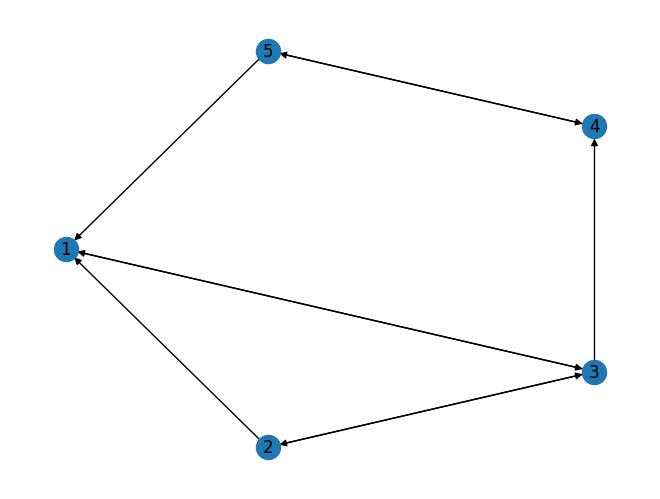

In [48]:
#SLIDE 28-31

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

myWeb = nx.DiGraph()  # Harus diinisialisasi sebagai objek, bukan class.
myPages = range(1, 6)  # Jumlah halaman adalah 5, sehingga perlu memasukkan nomor 5.

connections = [(1, 3), (2, 1), (2, 3), (3, 1), (3, 2), (3, 4), (4, 5), (5, 1), (5, 4)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)

pos = nx.shell_layout(myWeb)
nx.draw(myWeb, pos, arrows=True, with_labels=True)
plt.show()

In [60]:
#Slide 33
# Importing required libraries
import networkx as nx
import numpy as np

# Function to create PageRank
def CreatePageRank(aGraph):
    nodes_set = len(aGraph)
    M = nx.to_numpy_array(aGraph)
    outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
    prob_outwards = np.array(1.0 / outwards)
    G = np.multiply(M, prob_outwards[:, np.newaxis])

    p = np.ones(nodes_set) / float(nodes_set)
    return G, p

# Creating an instance of DiGraph
myWeb = nx.DiGraph()

# Adding edges to the graph
connections = [(1, 3), (2, 1), (2, 3), (3, 1), (3, 2), (3, 4), (4, 5), (5, 1), (5, 4)]
myWeb.add_edges_from(connections)

# Using the CreatePageRank function
G, p = CreatePageRank(myWeb)
print(G)

[[0.         1.         0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.        ]
 [0.5        0.5        0.         0.         0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.5        0.         0.         0.5        0.        ]]


In [57]:
# Slide 41
import numpy as np

# Matriks adjacency (0 berarti tidak ada tautan, 1 berarti ada tautan)
adjacency_matrix = np.array([[0, 1, 1, 1, 0],
                             [0, 0, 1, 0, 0],
                             [1, 0, 0, 0, 0],
                             [0, 0, 1, 0, 1],
                             [0, 0, 1, 1, 0]])

# Inisialisasi nilai awal PageRank
pagerank = np.array([1, 1, 1, 1, 1], dtype=float)


# Fakor Damping
damping_factor = 0.85

# Jumlah iterasi
num_iterations = 100

for i in range(num_iterations):
  # Insialisasi PageRank baru
  new_pagerank = np.zeros(pagerank.shape, dtype=float)

  for i in range(adjacency_matrix.shape[0]):
    for j in range(adjacency_matrix.shape[1]):
      # Hitung jumlah tautan keluar dari halaman 1
      num_outlinks = np.sum(adjacency_matrix[i, :])

      # Perbarui PageRank berdasarkan rumus PageRank
      if num_outlinks > 0:
        new_pagerank[j] += (damping_factor * pagerank[i] / num_outlinks)

  # Normalisasi PageRank
  new_pagerank += (1 - damping_factor) / len(pagerank)

  # Perbarui nilai PageRank
  pagerank = new_pagerank

# Hasil PageRank
print("Hasil PageRank: ")
print(pagerank)

Hasil PageRank: 
[1.72510772e+45 1.72510772e+45 1.72510772e+45 1.72510772e+45
 1.72510772e+45]


In [58]:
# Slide 43

import numpy as np

# Jumlah halaman
num_pages = 5

# Vectors of outlinks
outlinks = np.array([3, 2, 1, 2, 2])

# Vectors of inlinks
imlinks = np.array([1, 2, 1, 2, 1])

# Inisialiasai nilai awal PageRank
pagerank = np.ones(num_pages, dtype=float) / num_pages

# Faktor damping
damping_factor = 0.85

# Jumlah iterasi
num_iterations = 100

for _ in range(num_iterations):
  # Inisialisai PageRank baru
  new_pagerank = np.zeros(num_pages, dtype=float)

  for i in range(num_pages):
    for j in range(num_pages):
      if i != j and outlinks[j] > 0:
          new_pagerank[i] += damping_factor * (pagerank[j] / outlinks[j])

# Terapkan faktor damping dan tambahkan nilai konstan
pagerank = (1 - damping_factor) / num_pages + new_pagerank

# Hasil PageRank
print("Hasil PageRank:")
for i, pr in enumerate(pagerank):
  print(f"Halaman {chr(ord('A')+i)}: {pr:.4f}")

Hasil PageRank:
Halaman A: 0.4550
Halaman B: 0.4267
Halaman C: 0.3417
Halaman D: 0.4267
Halaman E: 0.4267


**LATIHAN PERTEMUAN 9**

In [9]:
#untuk menghitung page rank
import numpy as np
def PAGE_RANK(matriks):
    #define the adjaceny matrix
    adjacency_matrix = np.array(matriks)

    #Set the damping factor
    damping_factor = 0.85

    #initialize the page rank value

    num_pages = len(adjacency_matrix)
    page_rank = np.ones(num_pages) / num_pages

    #Number of iterations
    num_iterations = 100

    for i in range(num_iterations):
        new_page_rank = np.zeros(num_pages)
        for j in range(num_pages):
            #calculate the Pagerank contribution from each linking page
            linking_pages = [k for k in range(num_pages) if adjacency_matrix[k,j]==1]
            for linking_page in linking_pages:
                new_page_rank[j] += page_rank[linking_page]/sum(adjacency_matrix[linking_page, :])
            new_page_rank[j]=damping_factor * new_page_rank[j] + (1 - damping_factor)/ num_pages
        page_rank = new_page_rank

    #print the final Pagerank values
    for page, rank in enumerate(page_rank):
        print(f"PR(page {page+1})={rank:.3f}")

In [8]:
#untuk membuat grafik
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def Gambar (matriks):
    adjacency_matrix = np.array(matriks)

    #create a directed graph
    G = nx.DiGraph()

    #add nodes
    num_pages = len(adjacency_matrix)
    G.add_nodes_from(range(num_pages))

    #add edges based on the adjaceny matrix
    for i in range(num_pages):
        for j in range(num_pages):
            if adjacency_matrix[i, j] == 1:
                G.add_edge(i, j)

    #Draw the graph
    pos = nx.spring_layout(G) #Layout the graph
    labels = {i: f"Page{i+1}"for i in range(num_pages)}
    nx.draw(G, pos, with_labels=True, labels=labels, node_size=1000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)
    plt.title("PageRank Example Graph")
    plt.show()

PR(page 1)=0.025
PR(page 2)=0.046
PR(page 3)=0.064
PR(page 4)=0.080
PR(page 5)=0.093
PR(page 6)=0.104


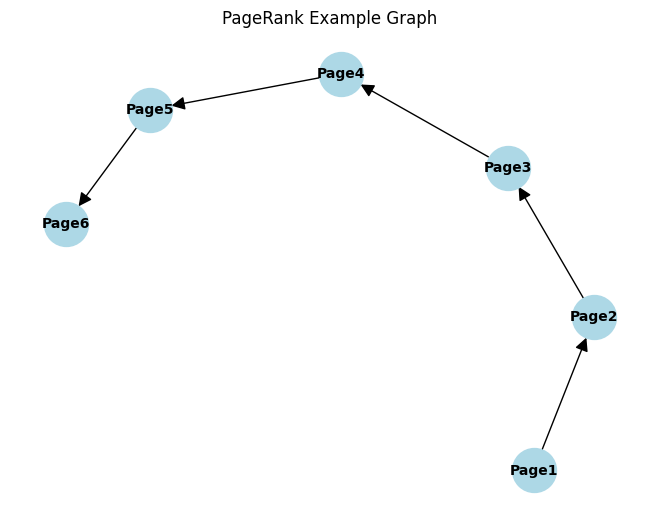

In [151]:
# LATIHAN 1
import numpy as np
matriks = np.array([[0,1,0,0,0,0],
                  [0,0,1,0,0,0],
                  [0,0,0,1,0,0],
                  [0,0,0,0,1,0],
                  [0,0,0,0,0,1],
                  [0,0,0,0,0,0]])
PAGE_RANK(matriks)
Gambar(matriks)

PR(page 1)=0.200
PR(page 2)=0.200
PR(page 3)=0.200
PR(page 4)=0.200
PR(page 5)=0.200


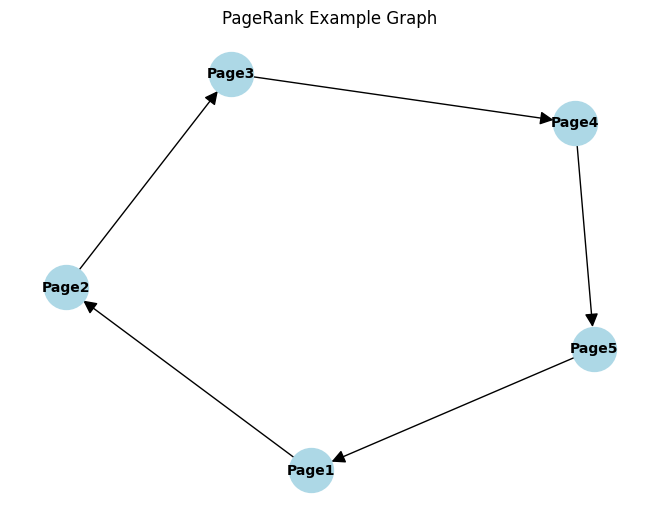

In [63]:
# LATIHAN 2
import numpy as np
adjacency_matrix = np.array([[0,1,0,0,0],
                            [0,0,1,0,0],
                            [0,0,0,1,0],
                            [0,0,0,0,1],
                            [1,0,0,0,0]])

PAGE_RANK(adjacency_matrix)
Gambar(adjacency_matrix)

PR(page 1)=0.175
PR(page 2)=0.325
PR(page 3)=0.325
PR(page 4)=0.175


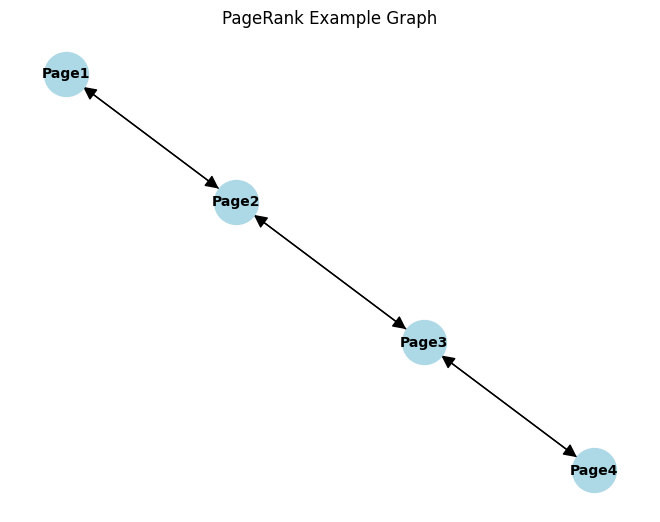

In [50]:
# LATIHAN 3
import numpy as np
matriks = ([[0,1,0,0],
            [1,0,1,0],
            [0,1,0,1],
            [0,0,1,0]])

PAGE_RANK(matriks)
Gambar(matriks)

PR(page 1)=0.167
PR(page 2)=0.167
PR(page 3)=0.167
PR(page 4)=0.167
PR(page 5)=0.167
PR(page 6)=0.167


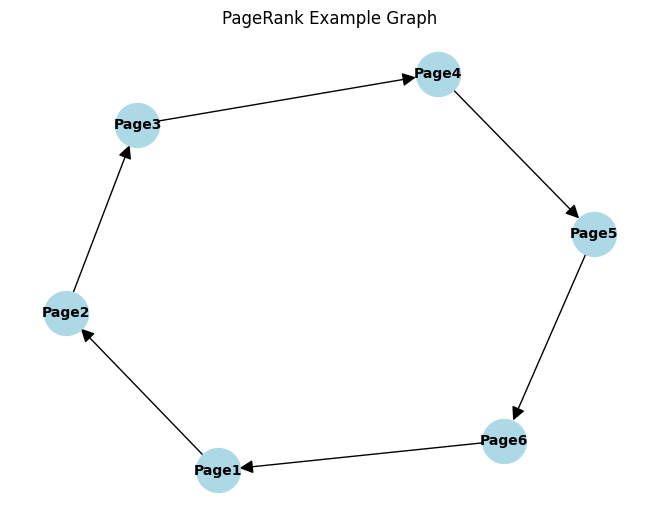

In [56]:
# LATIHAN 4
import numpy as np
matriks = np.array([[0,1,0,0,0,0],
                    [0,0,1,0,0,0],
                    [0,0,0,1,0,0],
                    [0,0,0,0,1,0],
                    [0,0,0,0,0,1],
                    [1,0,0,0,0,0]])

PAGE_RANK(matriks)
GAMBAR(matriks)

PR(page 1)=0.250
PR(page 2)=0.356
PR(page 3)=0.250
PR(page 4)=0.144


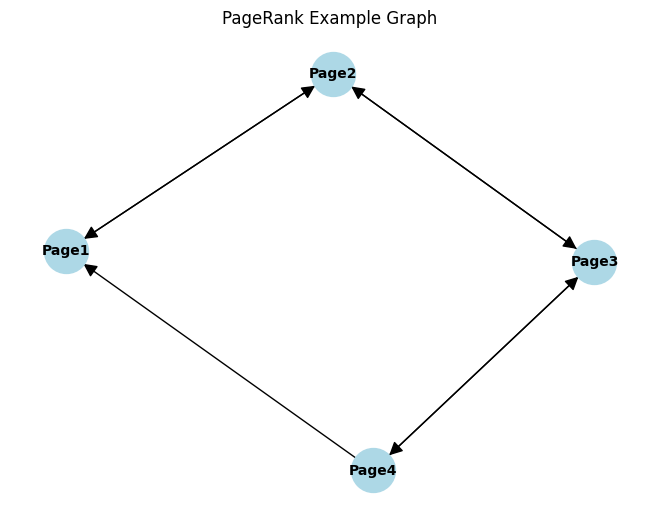

In [163]:
# LATIHAN 5
import numpy as np
matriks = np.array([[0,1,0,0],
                    [1,0,1,0],
                    [0,1,0,1],
                    [1,0,1,0]])

PAGE_RANK(matriks)
Gambar(matriks)

PR(page 1)=0.225
PR(page 2)=0.221
PR(page 3)=0.218
PR(page 4)=0.215
PR(page 5)=0.121


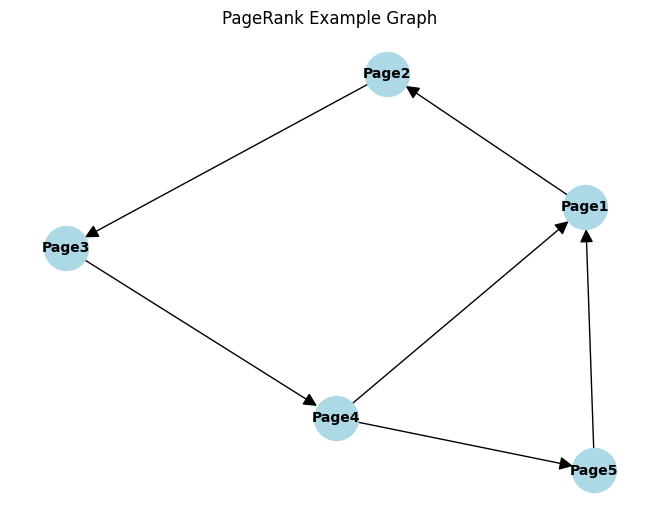

In [177]:
# LATIHAN 6
import numpy as np

matriks = np.array([[0,1,0,0,0],
                    [0,0,1,0,0],
                    [0,0,0,1,0],
                    [1,0,0,0,1],
                    [1,0,0,0,0]])

PAGE_RANK(matriks)
Gambar(matriks)

PR(page 1)=0.205
PR(page 2)=0.295
PR(page 3)=0.205
PR(page 4)=0.295


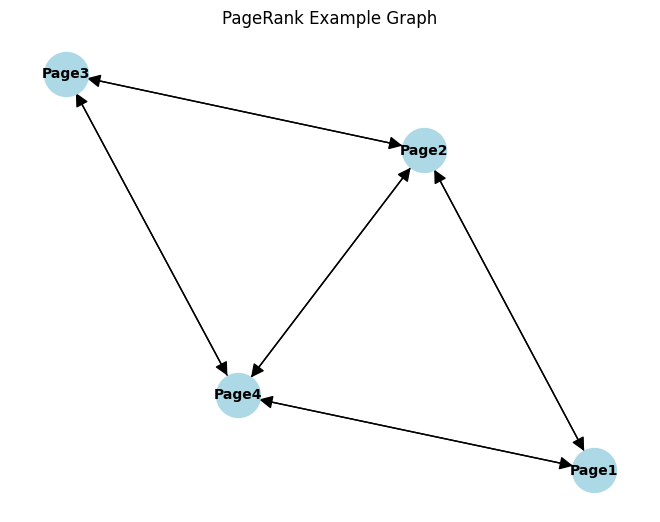

In [181]:
# LATIHAN 7
import numpy as np

matriks = np.array([[0,1,0,1],
                    [1,0,1,1],
                    [0,1,0,1],
                    [1,1,1,0]])

PAGE_RANK(matriks)
GAMBAR(matriks)

**Analisa Penerapan Algoritma Page Rank Dalam Permasalahan Kehidupan Manusia:**

Penerapan algoritma page rank dalam menjawab permasalahan sosial atau kehidupan manusia dapat digunakan untuk menentukan lokasi yang strategis dalam pengembangan komunitas atau perkotaan. Lokasi dengan konektivitas sosial yang tinggi dapat diidentifikasi untuk mendukung pertumbuhan yang berkelanjutan.